In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv(
    'Engineering Student Count Details (College wise - Branch wise).csv')
df_data = data.groupby('College Name').agg({'College Code': 'first', 'Category Name': 'first', 'University': 'first','District': 'first', 
                                                  'Zone': 'first', 'Group': 'first', 'Total No of students': 'sum', '1st year': 'sum'})
df_data = df_data.sort_values(by='College Code')
df_data['Zone'] = df_data['Zone'].fillna(method='ffill')
df_data['Group'] = df_data['Group'].fillna(method='ffill')
df_data = df_data[(df_data['Category Name'] != 'Affilated Autonomous') & (df_data['Category Name'] != 'Architecture') & (df_data['Total No of students'] > 20) & (df_data['1st year'] > 20)]
df_data

,College Code,Category Name,University,District,Zone,Group,Total No of students,1st year
College Name,,,,,,,,
"College Of Engineering,Guindy Campus",1,University Departments,ANNA UNIVERSITY,CHENNAI,Zone I : Chennai-I,1.0,3848,966
Alagappa college of technology anna university,2,University Departments,ANNA UNIVERSITY,CHENNAI,Zone I : Chennai-I,1.0,1814,443
"Madras Institute of Technology, Anna University",4,University Departments,ANNA UNIVERSITY,CHENNAI,Zone IV : MIT - Chromepet,1.0,2924,741
Aalim Muhammed Salegh College Of Engineering,1101,Affilated Non - Autonomous,ANNA UNIVERSITY,TIRUVALLUR,Zone I : Chennai-I,1.0,1120,280
GRT INSTITUTE OF ENGINEERING AND TECHNOLOGY,1103,Affilated Non - Autonomous,ANNA UNIVERSITY,TIRUVALLUR,Zone I : Chennai-I,1.0,847,260
...,...,...,...,...,...,...,...,...
"PET ENGINEERING COLLEGE, VALLIOOR",9632,Affilated Non - Autonomous,ANNA UNIVERSITY,TIRUNELVELI,Zone XX : Tirunelveli-II,5.0,692,173
ROHINI COLLEGE OF ENGINEERING AND TECHNOLOGY,9633,Affilated Non - Autonomous,ANNA UNIVERSITY,KANYAKUMARI,Zone XX : Tirunelveli-II,5.0,2240,553
STELLA MARY'S COLLEGE OF ENGINEERING,9635,Affilated Non - Autonomous,ANNA UNIVERSITY,KANYAKUMARI,Zone XVII : Nagercoil,5.0,1000,326


In [14]:
grouped_data = df_data.groupby('Zone').agg({'College Code': 'count', '1st year':'sum', 'Total No of students': 'sum'}).reset_index()
grouped_data

,Zone,College Code,1st year,Total No of students
0,Zone I : Chennai-I,18,4738,17340
1,Zone II : Chennai-II,17,5091,17241
2,Zone III : Chennai-III,14,4575,16088
3,Zone IV : MIT - Chromepet,16,3337,12443
4,Zone IX : Coimbatore - I,24,5968,20710
5,Zone V : Tindivanam,10,2529,8011
6,Zone VI : Arni,13,2604,9418
7,Zone VII : Dharmapuri,14,4240,14469
8,Zone VIII : Salem,24,7577,23315
9,Zone X : Coimbatore - II,13,4285,13427


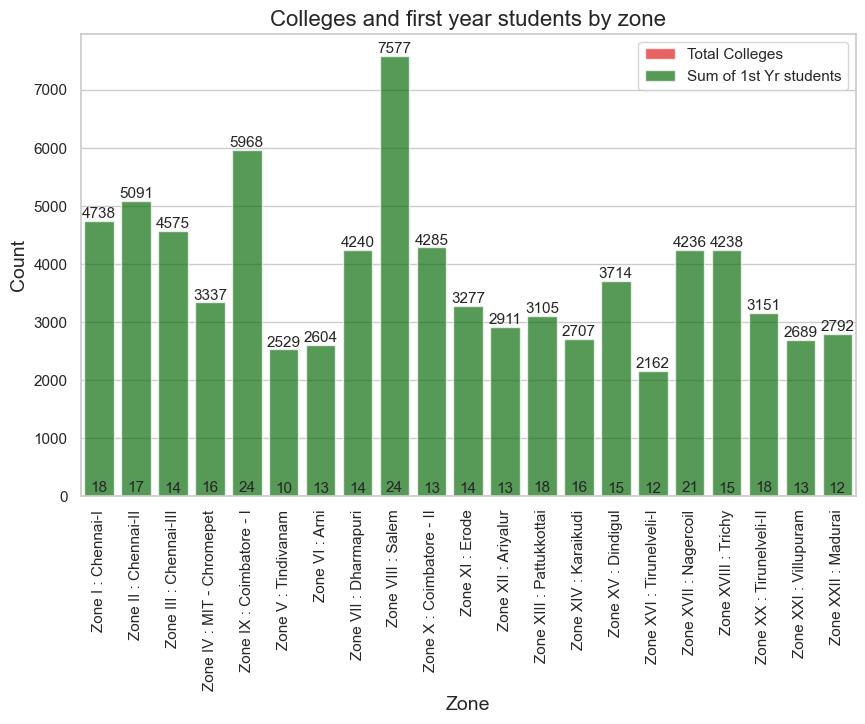

In [35]:
sns.set(style = 'whitegrid')
fig, ax = plt.subplots(figsize = (10,6))

sns.barplot(x='Zone', y='College Code', data = grouped_data, color = 'red', alpha = 0.7, label = 'Total Colleges')
sns.barplot(x='Zone', y='1st year', data = grouped_data, color = 'green', alpha = 0.7, label = 'Sum of 1st Yr students')

ax.set_xlabel('Zone', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
ax.set_title('Colleges and first year students by zone', fontsize = 16)
plt.xticks(rotation = 90)
plt.legend(loc = 'upper right')

for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label_type = 'edge', labels = grouped_data.iloc[:, i+1], fontsize = 11)
plt.show()

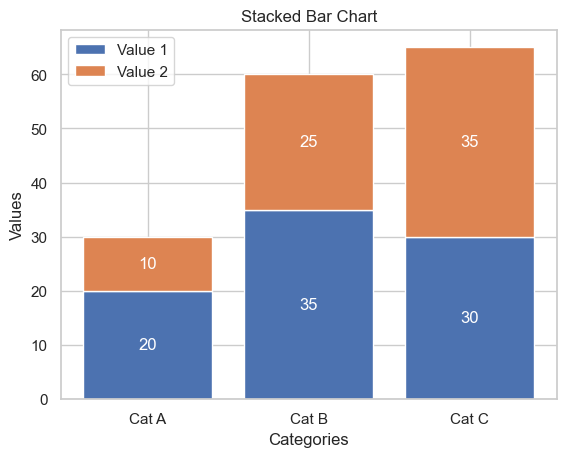

In [37]:
import matplotlib.pyplot as plt

# Data
categories = ['Cat A', 'Cat B', 'Cat C']
values1 = [20, 35, 30]
values2 = [10, 25, 35]

# Create stacked bar chart
plt.bar(categories, values1, label='Value 1')
plt.bar(categories, values2, bottom=values1, label='Value 2')

# Add labels and legend
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Stacked Bar Chart')
plt.legend()

# Add count values on top of bars
for i, val in enumerate(values1):
    plt.text(i, val/2, str(val), color='white', ha='center', va='center')
    plt.text(i, val+values2[i]/2, str(values2[i]), color='white', ha='center', va='center')

# Show chart
plt.show()



In [3]:
new_data = data[(data['Category Name'] != 'Affilated Autonomous') & (data['Category Name'] != 'Architecture')]
new_data

NameError: name 'data' is not defined

In [2]:
unique_branch_count = new_data['branch'].nunique()
print("Num of unique branches:",unique_branch_count)
unique_branch = new_data['branch'].unique()
unique_branch

NameError: name 'new_data' is not defined

In [68]:
new_data = new_data.copy()
new_data.loc[new_data['branch'].isnull(), 'branch'] = 'Others'
new_data.loc[:, 'Disciplines'] = 'OTHER'


new_data.loc[new_data['branch'].str.contains('computer', case = False), 'Disciplines'] = 'CS'
new_data.loc[new_data['branch'].str.contains('Artificial Intelligence', case = False), 'Disciplines'] = 'CS'

new_data.loc[new_data['branch'].str.contains('information', case = False), 'Disciplines'] = 'IT'

new_data.loc[new_data['branch'].str.contains('mech', case = False), 'Disciplines'] = 'MECH'
new_data.loc[new_data['branch'].str.contains('auto', case = False), 'Disciplines'] = 'MECH'

new_data.loc[new_data['branch'].str.contains('communication', case = False), 'Disciplines'] = 'ECE'
new_data.loc[new_data['branch'].str.contains('electronics', case = False), 'Disciplines'] = 'ECE'

new_data.loc[new_data['branch'].str.contains('electrical', case = False), 'Disciplines'] = 'EEE'

new_data.loc[new_data['branch'].str.contains('civil', case = False), 'Disciplines'] = 'CIVIL'


new_data




,College Code,College Name,Category Name,University,District,Zone,Group,branch,Total No of students,1st year,2nd year,3rd year,4th year,Disciplines
0,1101,Aalim Muhammed Salegh College Of Engineering,Affilated Non - Autonomous,ANNA UNIVERSITY,TIRUVALLUR,Zone I : Chennai-I,1.0,B.E Electronics and Communication Engineering,160,37,63,29,31,ECE
1,1101,Aalim Muhammed Salegh College Of Engineering,Affilated Non - Autonomous,ANNA UNIVERSITY,TIRUVALLUR,Zone I : Chennai-I,1.0,B.E Computer Science and Engineering,394,110,123,76,85,CS
2,1101,Aalim Muhammed Salegh College Of Engineering,Affilated Non - Autonomous,ANNA UNIVERSITY,TIRUVALLUR,Zone I : Chennai-I,1.0,B.E Civil Engineering,72,7,18,18,29,CIVIL
3,1101,Aalim Muhammed Salegh College Of Engineering,Affilated Non - Autonomous,ANNA UNIVERSITY,TIRUVALLUR,Zone I : Chennai-I,1.0,B.E Electrical and Electronics Engineering,81,10,29,26,16,EEE
4,1101,Aalim Muhammed Salegh College Of Engineering,Affilated Non - Autonomous,ANNA UNIVERSITY,TIRUVALLUR,Zone I : Chennai-I,1.0,B.Tech Information Technology,196,57,61,38,40,IT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,9639,Sun College of Engineering and Technology,Affilated Non - Autonomous,ANNA UNIVERSITY,KANYAKUMARI,Zone XXII : Madurai,5.0,B.E Petrochemical Engineering,1,1,0,0,0,OTHER
3448,9639,Sun College of Engineering and Technology,Affilated Non - Autonomous,ANNA UNIVERSITY,KANYAKUMARI,Zone XXII : Madurai,5.0,B.Tech Artificial Intelligence and Data Science,2,2,0,0,0,CS
3449,3135,Panimalar engineering college Chennai city campus,Affilated Non - Autonomous,ANNA UNIVERSITY,CHENNAI,Zone I : Chennai-I,1.0,B.E Computer Science and Engineering,183,183,0,0,0,CS
3450,3135,Panimalar engineering college Chennai city campus,Affilated Non - Autonomous,ANNA UNIVERSITY,CHENNAI,Zone I : Chennai-I,1.0,B.Tech Information Technology,59,59,0,0,0,IT


In [1]:
grouped = new_data.groupby(['Zone', 'Disciplines']).size().reset_index(name='count')
grouped

NameError: name 'new_data' is not defined

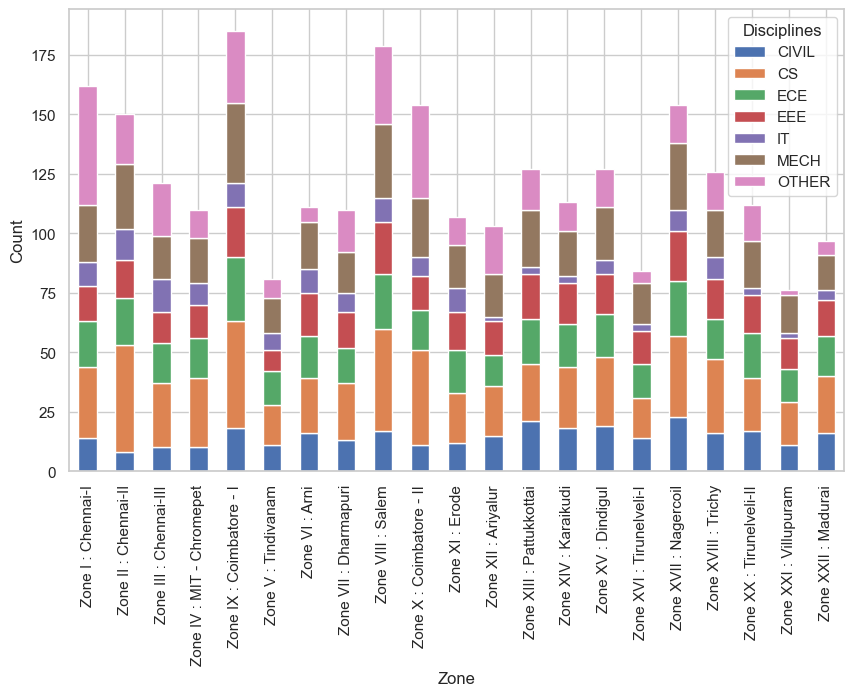

In [76]:
pivoted = grouped.pivot(index='Zone', columns='Disciplines', values='count').fillna(0)

ax = pivoted.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Zone')
ax.set_ylabel('Count')


plt.show()

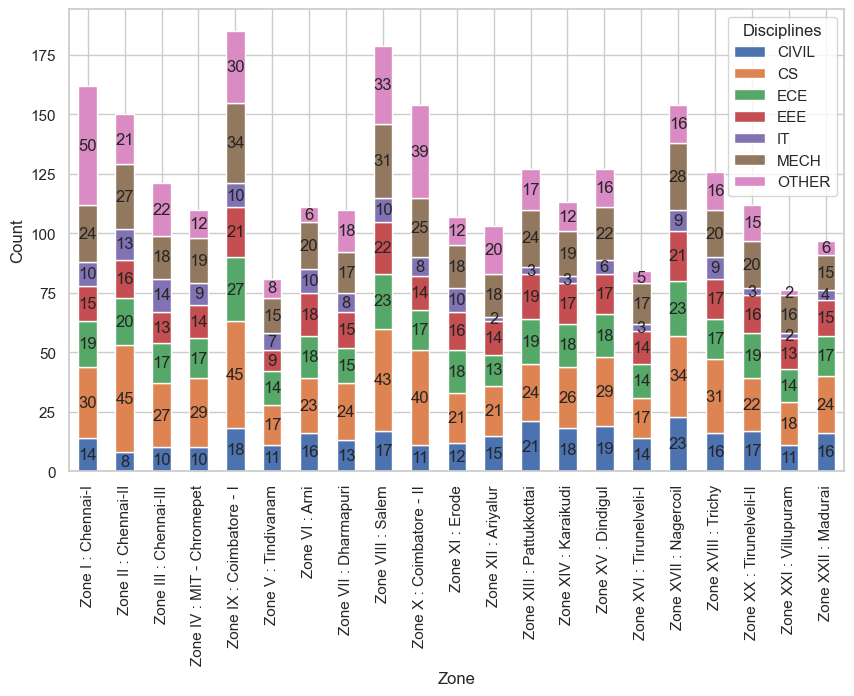

In [75]:
pivoted = grouped.pivot(index='Zone', columns='Disciplines', values='count').fillna(0)

ax = pivoted.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Zone')
ax.set_ylabel('Count')


for i, patch in enumerate(ax.patches):
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_y() + patch.get_height() / 2
    count = int(patch.get_height())
    ax.text(x, y, count, ha='center', va='center')

plt.show()

In [90]:
# Compute the number of colleges and students by zone
new_data = data[(data['Category Name'] != 'Affilated Autonomous') & (data['Category Name'] != 'Architecture')]
zone_stats = new_data.groupby('Zone').agg({'College Name': 'nunique', 'Total No of students': 'sum'})

print(zone_stats)

# Compute the maximum and minimum number of colleges and students
max_colleges = zone_stats['College Name'].idxmax()
max_students = zone_stats['Total No of students'].idxmax()
min_colleges = zone_stats['College Name'].idxmin()
min_students = zone_stats['Total No of students'].idxmin()

# Compute the average number of colleges across zones
avg_colleges = zone_stats['College Name'].mean()

# Print the results
print(f"Zone with maximum number of colleges: {max_colleges}")
print(f"Zone with maximum number of students: {max_students}")
print(f"Zone with minimum number of colleges: {min_colleges}")
print(f"Zone with minimum number of students: {min_students}")
print(f"Average number of colleges across zones: {avg_colleges}")


                           College Name  Total No of students
Zone                                                         
Zone I : Chennai-I                   16                 13771
Zone II : Chennai-II                 17                 14737
Zone III : Chennai-III               14                 14248
Zone IV : MIT - Chromepet            13                 10041
Zone IX : Coimbatore - I             23                 17587
Zone V : Tindivanam                   9                  6781
Zone VI : Arni                       13                  7156
Zone VII : Dharmapuri                14                 11956
Zone VIII : Salem                    24                 20920
Zone X : Coimbatore - II             13                 11512
Zone XI : Erode                      14                  9605
Zone XII : Ariyalur                  12                  7557
Zone XIII : Pattukkottai             17                  9156
Zone XIV : Karaikudi                 16                  6575
Zone XV 

Student density by zone: 
Zone
Zone I : Chennai-I            815.954545
Zone II : Chennai-II         1021.157895
Zone III : Chennai-III       1012.687500
Zone IV : MIT - Chromepet     735.000000
Zone IX : Coimbatore - I      891.280000
Zone V : Tindivanam           688.333333
Zone VI : Arni                577.944444
Zone VII : Dharmapuri         922.500000
Zone VIII : Salem             910.153846
Zone X : Coimbatore - II     1304.500000
Zone XI : Erode               705.277778
Zone XII : Ariyalur           693.125000
Zone XIII : Pattukkottai      654.400000
Zone XIV : Karaikudi          517.210526
Zone XV : Dindigul            971.166667
Zone XVI : Tirunelveli-I      536.533333
Zone XVII : Nagercoil         670.750000
Zone XVIII : Trichy           890.117647
Zone XX : Tirunelveli-II      656.578947
Zone XXI : Villupuram         735.714286
Zone XXII : Madurai           681.000000
dtype: float64


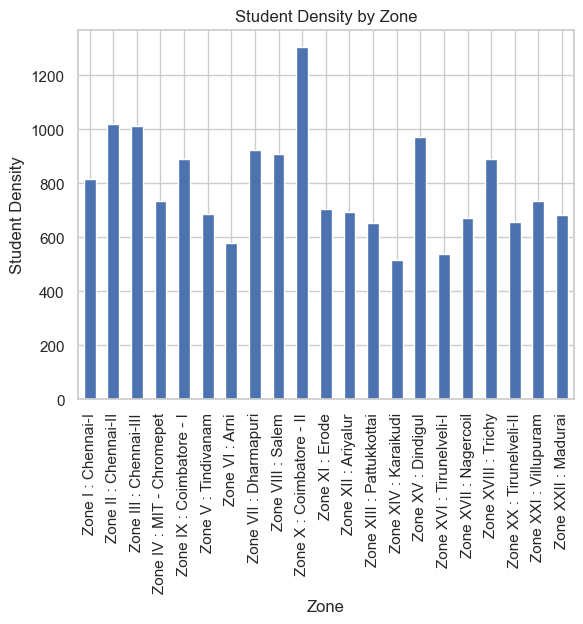

In [86]:
student_density = zone_stats['Total No of students'] / zone_stats['College Name']
print(f"Student density by zone: \n{student_density}")

# Display student density as a bar chart
student_density.plot(kind='bar')
plt.xlabel('Zone')
plt.ylabel('Student Density')
plt.title('Student Density by Zone')
plt.show()
